In [588]:
import pandas as pd 
import numpy as np 
from os import chdir

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc, pyplot

import matplotlib
matplotlib.rc('axes',unicode_minus=False)

from datetime import date
import datetime 
import seaborn as sns

# 나이스지니데이터

In [589]:
chdir('C:/Users/user/Desktop/농식품/data')
nice = pd.read_csv('(10-16). 나이스지니 데이터 - 12. 업종별 소비지역별 소비데이터.csv', header=1)

In [590]:
nice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준년월        3433 non-null   int64 
 1   소비지역 광역시도명  3433 non-null   object
 2   소비지역 시군구명   3433 non-null   object
 3   대분류업종       3433 non-null   object
 4   중분류업종       3433 non-null   object
 5   소비금액        3433 non-null   object
 6   소비건수        3433 non-null   object
 7   소비자수        3433 non-null   object
dtypes: int64(1), object(7)
memory usage: 214.7+ KB


In [591]:
nice['소비건수'] = nice['소비건수'].str.replace(',','')
nice['소비건수'] = nice['소비건수'].astype(float)

### 시도

In [592]:
nice1 = pd.DataFrame(nice[nice['대분류업종']=='소매/유통'].groupby('소비지역 광역시도명').sum()['소비건수'])
nice1 = nice1.rename_axis('광역시도명').reset_index()
nice1['소비건수%']=nice1['소비건수']/nice1['소비건수'].sum() 
nice1

,광역시도명,소비건수,소비건수%
0,강원도,15290927.0,0.025791
1,경기도,148833476.0,0.251039
2,경상남도,30121899.0,0.050807
3,경상북도,23165382.0,0.039073
4,광주광역시,15038357.0,0.025365
5,대구광역시,26858594.0,0.045303
6,대전광역시,16330379.0,0.027545
7,부산광역시,42432546.0,0.071571
8,서울특별시,146319811.0,0.246799
9,세종특별자치시,2893619.0,0.004881


### 서울특별시

In [593]:
nice2 = pd.DataFrame(nice[ (nice['대분류업종']=='소매/유통') & (nice['소비지역 광역시도명']=='서울특별시')].groupby('소비지역 시군구명').sum()['소비건수'])
nice2 = nice2.rename_axis('시군구명').reset_index()
nice2['소비건수%'] = nice2['소비건수']/nice2['소비건수'].sum() * 0.02 * 100
nice2

,시군구명,소비건수,소비건수%
0,강남구,12891076.0,0.176204
1,강동구,5282365.0,0.072203
2,강북구,3458569.0,0.047274
3,강서구,7592532.0,0.103780
4,관악구,7808477.0,0.106732
5,광진구,5511361.0,0.075333
6,구로구,5520072.0,0.075452
7,금천구,6286372.0,0.085926
8,노원구,5399807.0,0.073808
9,도봉구,3232513.0,0.044184


# 가락시장

- 배추, 무, 마늘, 양파

In [229]:
ts_days = pd.DataFrame(pd.date_range('2016-01-04', periods=1830), columns = ['기준일'])
ts_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     1830 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.4 KB


In [230]:
ts_days.tail()

,기준일
1825,2021-01-02
1826,2021-01-03
1827,2021-01-04
1828,2021-01-05
1829,2021-01-06


### 농식품

In [633]:
chdir('C:/Users/user/Desktop/농식품/data/배추')

In [634]:
cabbage = pd.read_csv('cabbage.csv', encoding='cp949')
cabbage['기준일'] = pd.to_datetime(cabbage['일자'].astype(str),format='%Y%m%d')
del cabbage['일자']
cabbage.info()
cabbage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   계_톤     1502 non-null   float64       
 1   기준일     1502 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.6 KB


,계_톤,기준일
0,632.335,2016-01-04
1,437.191,2016-01-05
2,382.481,2016-01-06
3,374.310,2016-01-07
4,378.142,2016-01-08
...,...,...
1497,606.496,2020-12-01
1498,534.986,2020-12-02
1499,430.645,2020-12-03
1500,718.773,2020-12-04


In [635]:
cabbage = pd.merge(ts_days, cabbage, how='left')
cabbage = cabbage.interpolate(method='nearest')
cabbage_series = cabbage.set_index('기준일')

In [636]:
# 1) 데이터 유형을 ARIMA에 적합한 float로 변환
cabbage_series = cabbage_series.loc[:,'계_톤'].astype(np.float)
cabbage_series

기준일
2016-01-04    632.335
2016-01-05    437.191
2016-01-06    382.481
2016-01-07    374.310
2016-01-08    378.142
               ...   
2021-01-02        NaN
2021-01-03        NaN
2021-01-04        NaN
2021-01-05        NaN
2021-01-06        NaN
Name: 계_톤, Length: 1830, dtype: float64

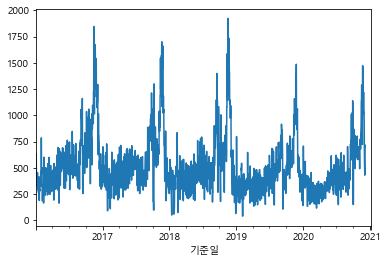

In [637]:
cabbage_series.plot()
plt.show()

In [638]:
cabbage_count = cabbage_series[:'2019-12-31']
# cabbage_count = cabbage_series

In [639]:
# 2) 나중에 참 값과 비교를 위해 일부 데이터 추출
mco_trunc1 = cabbage_count[:'2019-12-31']
mco_trunc1

기준일
2016-01-04    632.335
2016-01-05    437.191
2016-01-06    382.481
2016-01-07    374.310
2016-01-08    378.142
               ...   
2019-12-27    263.256
2019-12-28    254.383
2019-12-29    254.383
2019-12-30    439.661
2019-12-31    141.601
Name: 계_톤, Length: 1458, dtype: float64

In [640]:
# 3) dataframe 형태 및, columns ds와 y로 설정
df1 = pd.DataFrame({'ds' : mco_trunc1.index, 'y' : mco_trunc1.values})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1458 non-null   datetime64[ns]
 1   y       1458 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [641]:
#pip install fbprophet

In [642]:
from fbprophet import Prophet
import pandas as pd

m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [643]:
# 미래 dataframe 생성
future = m.make_future_dataframe(periods=372)
future.tail()

,ds
1825,2021-01-02
1826,2021-01-03
1827,2021-01-04
1828,2021-01-05
1829,2021-01-06


In [644]:
# 예측
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1825,2021-01-02,81.248102,-106.122961,263.049006
1826,2021-01-03,86.579523,-90.011136,283.263547
1827,2021-01-04,291.741699,111.221399,467.289124
1828,2021-01-05,206.471691,27.864672,393.725853
1829,2021-01-06,193.422200,10.474349,366.321812


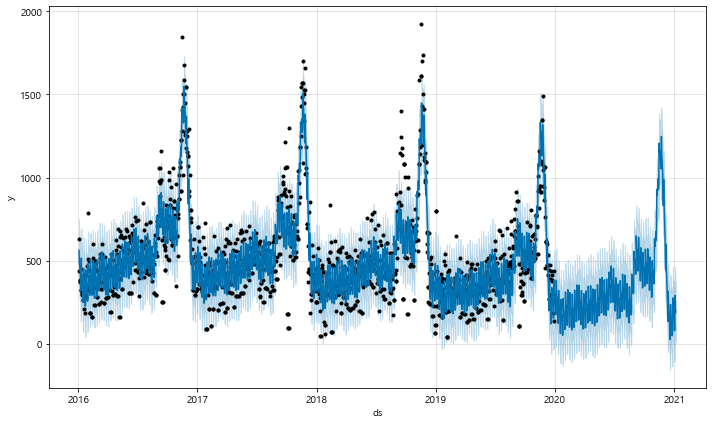

In [645]:
# 시각화
fig1 = m.plot(forecast)

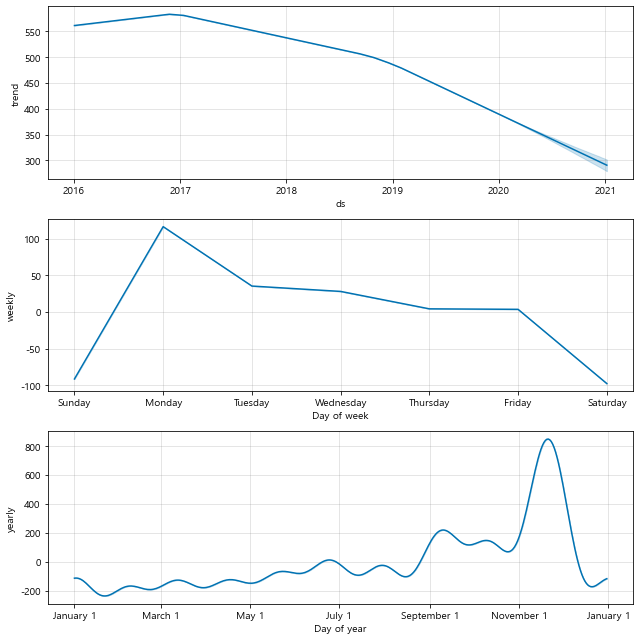

In [646]:
fig2 = m.plot_components(forecast)

In [647]:
#pip install mpldatacursor

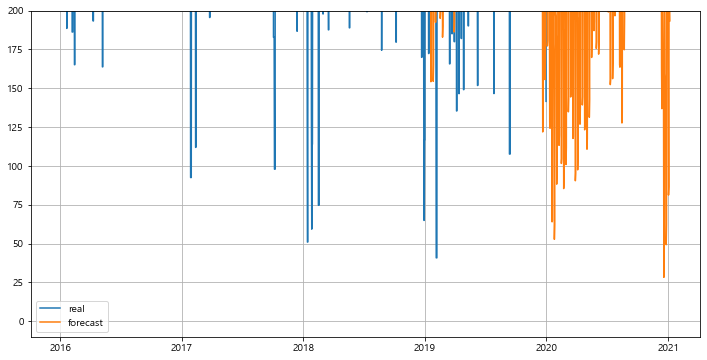

In [648]:
from mpldatacursor import datacursor

plt.figure(figsize=(12,6))
plt.plot(cabbage_count.index, cabbage_count.values, label='real')
line = plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
# plt.ylim(-10, 200)
plt.show()

In [649]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,561.392731,394.388002,752.439091,561.392731,561.392731,2.399019,2.399019,2.399019,116.586947,116.586947,116.586947,-114.187928,-114.187928,-114.187928,0.0,0.0,0.0,563.791750
1,2016-01-05,561.460335,294.575482,657.001439,561.460335,561.460335,-81.396795,-81.396795,-81.396795,35.544669,35.544669,35.544669,-116.941464,-116.941464,-116.941464,0.0,0.0,0.0,480.063540
2,2016-01-06,561.527939,275.546191,648.244790,561.527939,561.527939,-93.058507,-93.058507,-93.058507,28.233822,28.233822,28.233822,-121.292330,-121.292330,-121.292330,0.0,0.0,0.0,468.469432
3,2016-01-07,561.595543,256.996129,619.054712,561.595543,561.595543,-122.649350,-122.649350,-122.649350,4.469757,4.469757,4.469757,-127.119107,-127.119107,-127.119107,0.0,0.0,0.0,438.946193
4,2016-01-08,561.663147,258.526022,612.185675,561.663147,561.663147,-130.456395,-130.456395,-130.456395,3.797296,3.797296,3.797296,-134.253691,-134.253691,-134.253691,0.0,0.0,0.0,431.206752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,2021-01-02,291.788039,-106.122961,263.049006,280.483807,302.681124,-210.539937,-210.539937,-210.539937,-97.449139,-97.449139,-97.449139,-113.090799,-113.090799,-113.090799,0.0,0.0,0.0,81.248102
1826,2021-01-03,291.521251,-90.011136,283.263547,280.133218,302.447464,-204.941728,-204.941728,-204.941728,-91.183353,-91.183353,-91.183353,-113.758376,-113.758376,-113.758376,0.0,0.0,0.0,86.579523
1827,2021-01-04,291.254463,111.221399,467.289124,279.797519,302.224425,0.487236,0.487236,0.487236,116.586947,116.586947,116.586947,-116.099711,-116.099711,-116.099711,0.0,0.0,0.0,291.741699
1828,2021-01-05,290.987674,27.864672,393.725853,279.494513,302.003852,-84.515983,-84.515983,-84.515983,35.544669,35.544669,35.544669,-120.060652,-120.060652,-120.060652,0.0,0.0,0.0,206.471691


### 주차 (4주차)

In [650]:
a = forecast[['ds','yhat']]
a.rename(columns = {'ds' : '12월 한달'}, inplace = True)
                    
a_series = a.set_index('12월 한달')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [651]:
# 2) 나중에 참 값과 비교를 위해 일부 데이터 추출
a2 = a_series['2020-12-01':'2020-12-31']
a2

,yhat
12월 한달,
2020-12-01,855.023490
2020-12-02,792.241057
2020-12-03,711.766958
2020-12-04,653.940885
2020-12-05,495.876644
2020-12-06,446.408723
2020-12-07,600.231978
2020-12-08,467.672815
2020-12-09,411.847929


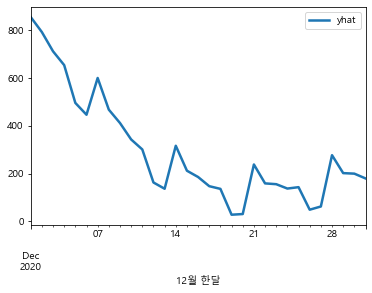

In [652]:
a2.plot(linewidth=2.5)

In [653]:
b1 = a_series['2020-12-07':'2020-12-13']
b1[['yhat']].sum()

yhat    2424.084418
dtype: float64

In [571]:
b11 = a_series['2020-11-30':'2020-12-06']
b11[['yhat']].sum()

yhat    1721.020058
dtype: float64

In [572]:
(b1[['yhat']].sum()-b11[['yhat']].sum())/b11[['yhat']].sum()

yhat    0.145626
dtype: float64

In [573]:
b2 = a_series['2020-12-01':'2020-12-31']
b2[['yhat']].sum()

yhat    10213.880122
dtype: float64

In [574]:
b22 = a_series['2020-11-01':'2020-11-30']
b22[['yhat']].sum()

yhat    8394.243813
dtype: float64

In [575]:
(b2[['yhat']].sum()-b22[['yhat']].sum())/b22[['yhat']].sum()

yhat    0.216772
dtype: float64

In [576]:
b3 = a_series['2020-01-01':'2020-12-31']
b3[['yhat']].sum()

yhat    157931.607526
dtype: float64

In [577]:
b33 = a_series['2019-01-01':'2019-12-31']
b33[['yhat']].sum()

yhat    177270.080643
dtype: float64

In [578]:
(b3[['yhat']].sum()-b33[['yhat']].sum())/b33[['yhat']].sum()

yhat   -0.10909
dtype: float64

In [579]:
week = pd.DataFrame(result)
week= week.transpose()
week.columns = ['1주차','2주차','3주차','4주차','5주차']

In [486]:
%matplotlib inline
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
mpl.rcParams['axes.unicode_minus'] = False 

ValueError: setting an array element with a sequence.

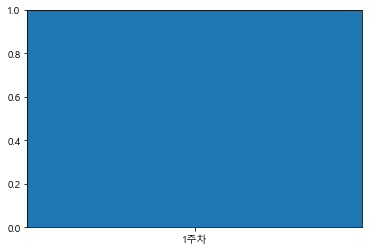

In [487]:
# Basic Bar Chart

column = ['1주차','2주차','3주차','4주차','5주차']
plt.bar(column, result)

plt.title('Demand Change by Week', fontsize=20)
# plt.ylabel('Sum of Demand', fontsize=18)
plt.show()

### 일자 (7일차)

In [488]:
a = forecast[['ds','yhat']]
a_series = a.set_index('ds')

In [489]:
# 2) 나중에 참 값과 비교를 위해 일부 데이터 추출
a2 = a_series['2020-12-09':'2020-12-15']
a2

,yhat
ds,
2020-12-09,411.847929
2020-12-10,343.064670
2020-12-11,301.271344
2020-12-12,163.111731
2020-12-13,136.883951
2020-12-14,316.693820
2020-12-15,212.240718


In [490]:
# a2.plot(linewidth = 2.5)